In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [2]:
df = pd.read_csv('coaster_db.csv')

In [4]:
df.shape

(1087, 56)

In [11]:
#df.head(5)

In [17]:
#df.columns


In [13]:
#df.dtypes

In [15]:
#df.describe()

In [3]:
df = df[['coaster_name', 
    #'
    #Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
       #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 
    #'Opened', 'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
    'latitude', 'longitude', 
    'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [4]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [5]:
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [6]:
#renaming our columns
df = df.rename(columns={'coaster_name':'Coaster_name'})

In [30]:
#df.head()

In [7]:
#missing VALUES
df.isna().sum()

Coaster_name            0
Location                0
Status                213
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [8]:
#IF THERE IS IDENTICALLY SAME
df.loc[df.duplicated()]

,Coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [40]:
df.loc[df.duplicated(subset=['Coaster_name'])]


,Coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [9]:
df.loc[df.duplicated(subset=['Coaster_name'])].head(5)


,Coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [40]:
df.loc[df.duplicated(subset=['Coaster_name'])]


,Coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [10]:
#CHECKING AND EXAMPLE DUPLICATE
df.query ('Coaster_name == "Crystal Beach Cyclone"')

,Coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [11]:
df = df.loc[~df.duplicated(subset=['Coaster_name','Location','opening_date_clean'])] \
    .reset_index(drop=True).copy()

In [53]:
df

,Coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


Step 3: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions
Histogram
KDE
Boxplot

In [55]:
#df.to_csv("new_coaster_db.csv", index=False)

Text(0, 0.5, 'COUNT')

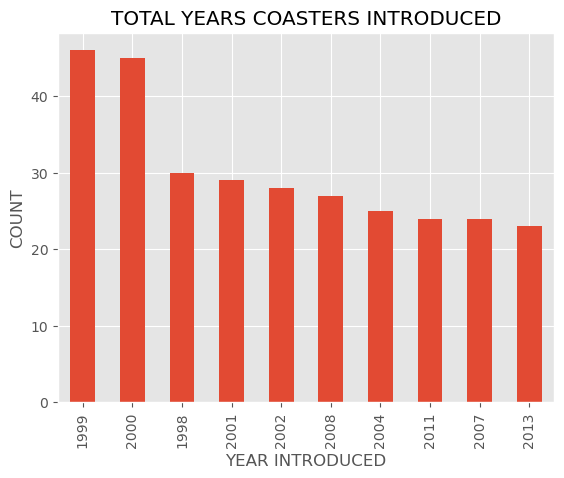

In [12]:
ax = df['year_introduced'].value_counts()\
.head(10)\
.plot(kind='bar', title='TOTAL YEARS COASTERS INTRODUCED')
ax.set_xlabel('YEAR INTRODUCED')
ax.set_ylabel('COUNT')

Text(0.5, 0, 'speed(Mph)')

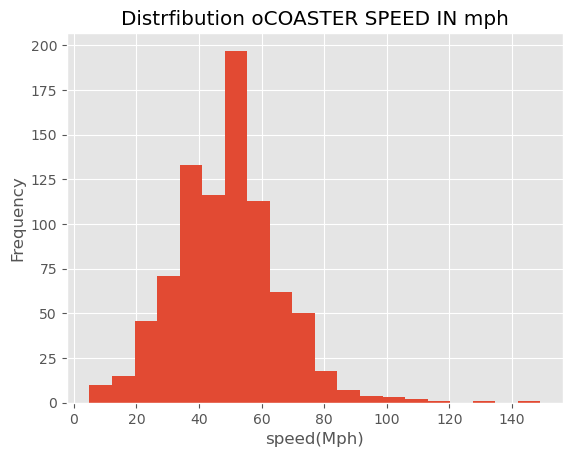

In [13]:
ax = df['speed_mph'].plot(kind='hist', 
                          bins=20, 
                          title='Distrfibution oCOASTER SPEED IN mph')
ax.set_xlabel('speed(Mph)')

Text(0.5, 0, 'speed(Mph)')

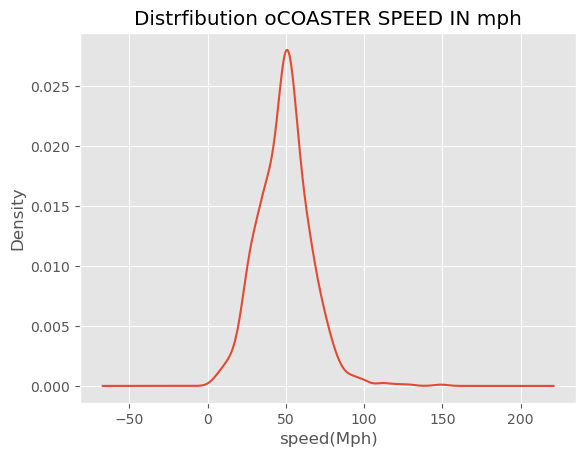

In [14]:
ax = df['speed_mph'].plot(kind='kde',  
                          title='Distrfibution oCOASTER SPEED IN mph')
ax.set_xlabel('speed(Mph)')

In [15]:
df['Type_Main'].value_counts()

Steel    728
Wood     191
Other     71
Name: Type_Main, dtype: int64

# Step 4: Feature Relationships¶
Scatterplot
Heatmap Correlation
Pairplot
Groupby comparisons

NameError: name 'plot' is not defined

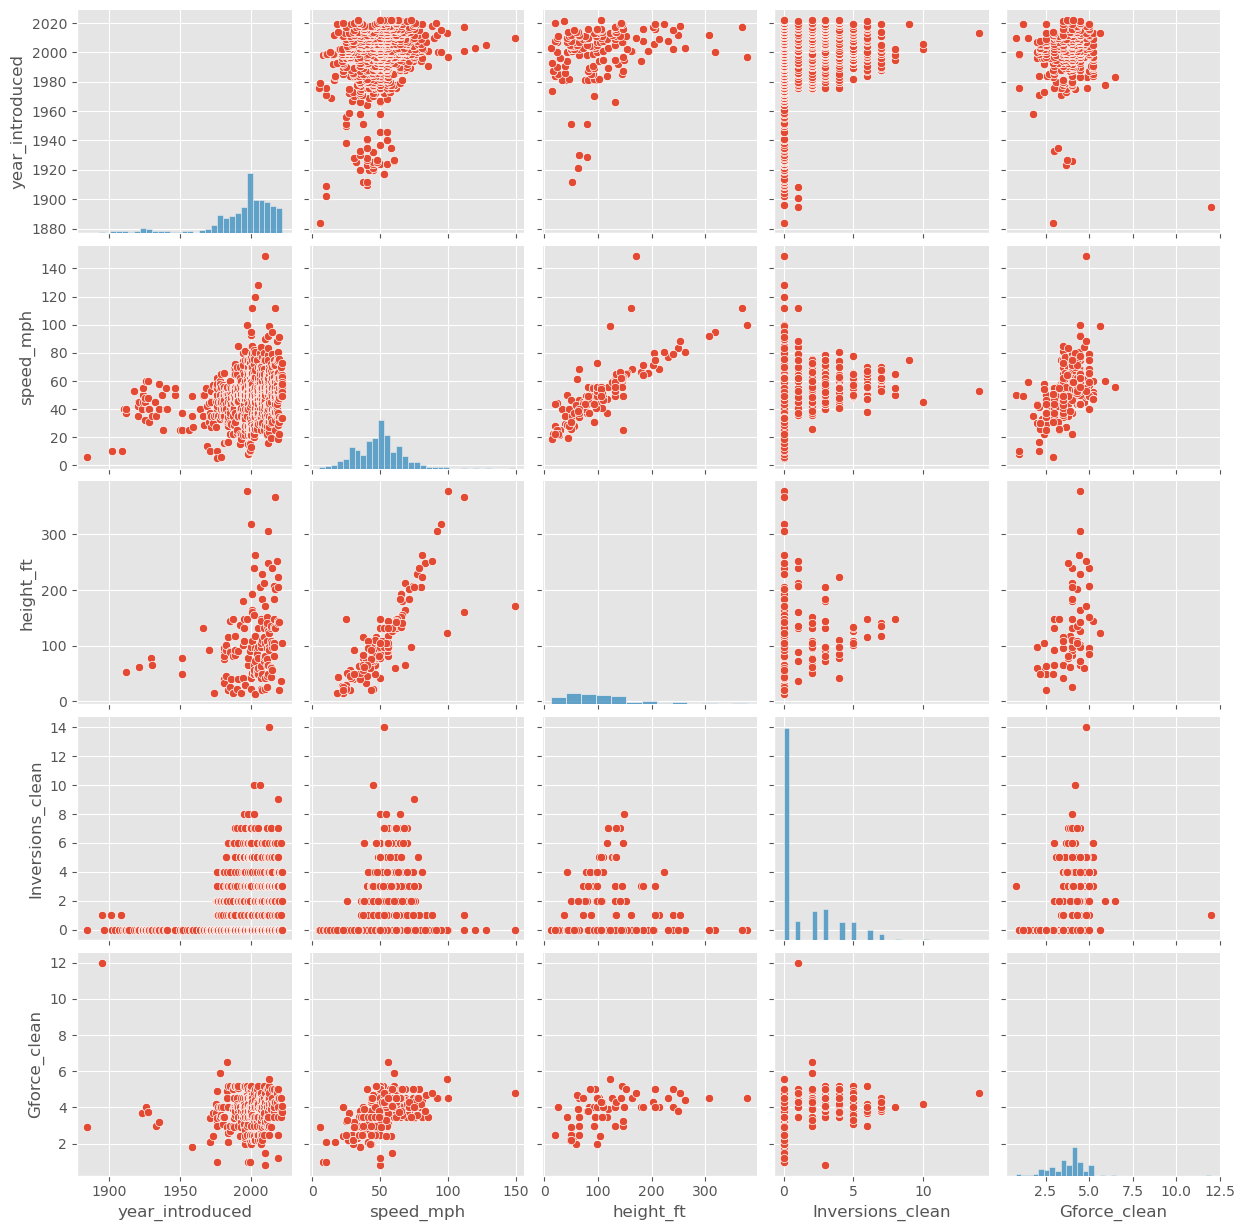

In [16]:
sns.pairplot(df, vars=['year_introduced', 'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce_clean'])
plot.show()